# Section 1 : Introduction to GitLab CI/CD & Fundametal CI/CD concepts & DevOps

CI = Continuous Integration

CD = Continuous Deployment

Backgound working to release a new version
1. Compile Code
2. Run Tests
3. Build a new version
4. Deploy the app

`.gitlab-ci.yml` is a configuration file to build pipeline and need to locate in the root of the repository

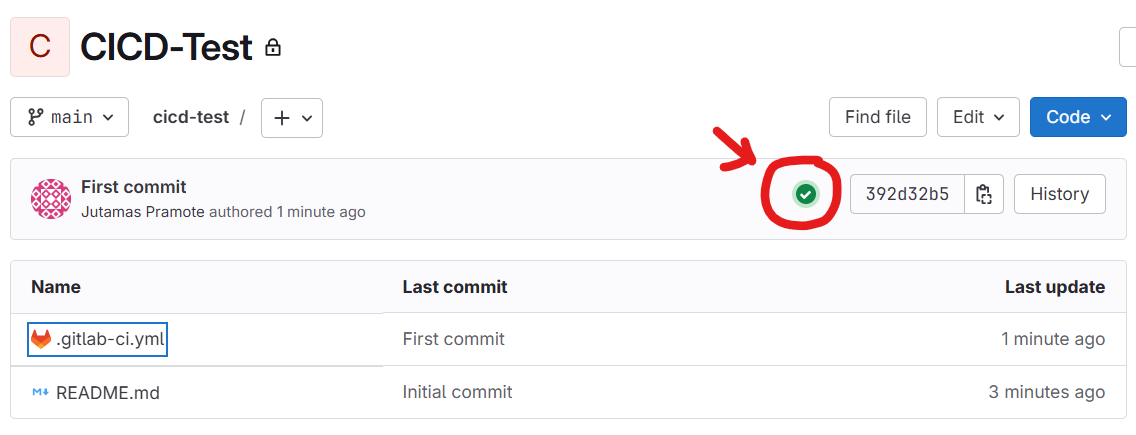

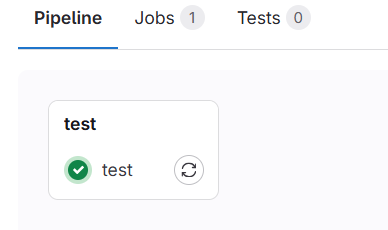

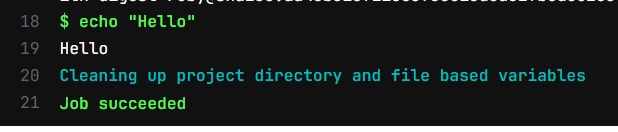

In the yml file contains a series of Linux command because by default GitLab use Docker which run based on Linux

* Gitlab won't save any file unless command it
* Cannot commit a file while running the pipeline
* Something is created in the pipeline called `Artifact`

### Pipeline Stages

A pipeline can have several stages, each stage have a job or more than one.
Creating images for each stage, need to define `stages` otherwise it will run as parallel in same stage.
A job without assigning a stage will automatically be `test` stage


[code]
```yml
stages:
  - build
  - test

build-car:
  image: alpine # Docker image based on Alpine Linux Distribution
  stage: build

test-car:
  image: alpine
  stage: test
```
[/code]

In this case, There are two stages including build and test

### Artifact

Everything created in an image is seperated location and all will be delete eventaully. So sharing the artifact it needs to specify path to let other images get into them by `artifacts`

[code]
```yml
build-car:
  image: alpine
  ..
  artifacts:
    paths:
      - build/

test-car:
  image: alpine
  ..
  script:
    - test -f build/car.txt # Linux CMD: to check if a file is exists
    - grep "chassis" build/car.txt
```
[/code]

### GitLab Architecture

Include 2 parts
1. GitLab Server
    - Manages the pipelines and the associated jobs
    - Stores the results
    - Cooridinates the work but delegates the execution
2. GitLab Runner
    - Executes the job
    - There is at least one runner to execute and could have more to help distribute the load
    - May have some specialized runner for some specific job
    - Recieve a set of instructions from the server and report back the result of the execution

First part is preparation for running the command

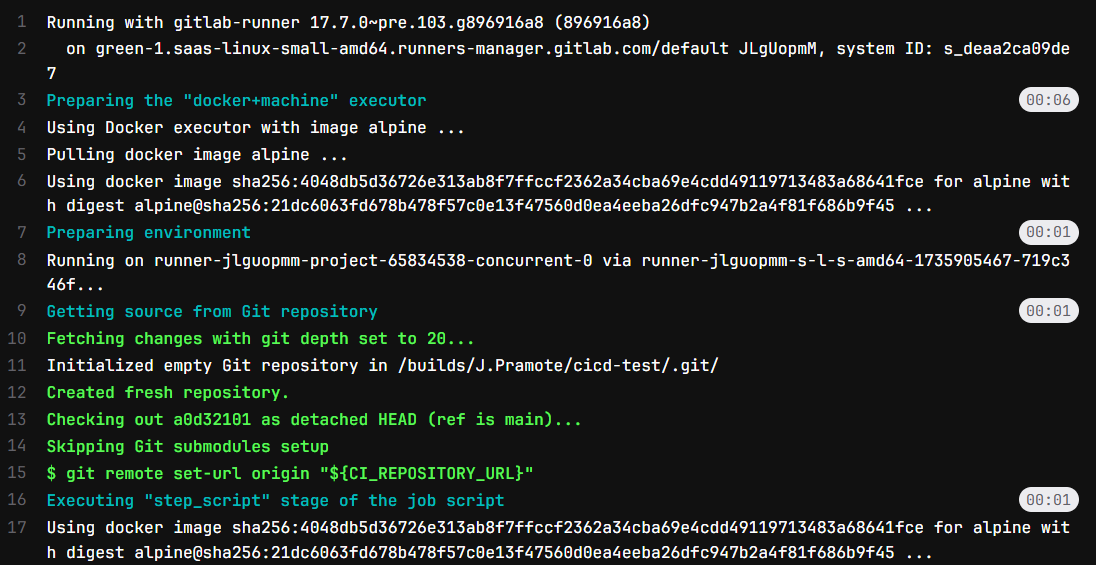

First step, It pick an available runner on GitLab to use

`Preparing the "docker+machine" executor`
Pull docker image

`Preparing environment`
Start container

`Getting source from Git repository`
Fetch the source code

`Executing "step_script" stage of the job script`
Use the image to run the script


*DevOpv* is who working on automate task for working with CI/CD
